<a href="https://colab.research.google.com/github/CatoGit/Comparing-the-Performance-of-Deepfake-Detection-Methods-on-Benchmark-Datasets/blob/master/Xception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reimplementation of Francois Chollet's Xception: Deep Learning with Depthwise Separable Convolutions. (https://arxiv.org/pdf/1610.02357.pdf)

Reimplementation by: Christopher Otto

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Input, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Conv2D, SeparableConv2D, ReLU, Add
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras import Model

In [2]:
print(tf.__version__)

2.2.0-rc2


In [0]:
def module1(input, filters, kernel_size, strides):
    """Xception Module 1/14 - Entry Module"""
    x = Conv2D(filters=filters, 
               kernel_size=kernel_size, 
               strides=strides,
               use_bias=False)(input)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters=64, 
               kernel_size=(3,3), 
               strides=(1,1),
               use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x


def module2(tensor, 
            filters, 
            kernel_size, 
            strides,
            padding,
            bias):
    """Xception Module 2/14"""
    x = SeparableConv2D(filters=filters, 
                        kernel_size=kernel_size, 
                        strides=strides,
                        padding=padding,
                        use_bias=bias)(tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = SeparableConv2D(filters=128,
                        kernel_size=(3,3),
                        strides=(1,1),                      
                        padding='same',
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
    #calculate resiudal
    residual = linear_residual_connection(tensor,
                                   filters=128,
                                   kernel_size=(1,1),
                                   strides=(2,2),
                                   padding='same',
                                   bias = False)
    
    #perform addition of residual and module output
    x = Add()([x, residual])
    return x

def module3(tensor, 
            filters, 
            kernel_size, 
            strides,
            padding,
            depth_multiplier,
            bias):
    """Xception Module 3/14"""
    x = ReLU()(tensor)
    x = SeparableConv2D(filters=filters,
                        kernel_size=kernel_size,
                        strides=strides,
                        padding='same',
                        depth_multiplier=1,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = SeparableConv2D(filters=256,
                        kernel_size=(3,3),
                        strides=(1,1),
                        padding='same',
                        depth_multiplier=1,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same')(x)
    #calculate resiudal
    residual = linear_residual_connection(tensor,
                                   filters=256,
                                   kernel_size=(1,1),
                                   strides=(2,2),
                                   padding='same',
                                   bias = False)

    #perform addition of residual and module output
    x = Add()([x, residual])
    return x


def module4(tensor, 
            filters, 
            kernel_size, 
            strides,
            padding,
            depth_multiplier,
            bias):
    """Xception Module 4/14"""
    x = ReLU()(tensor)
    x = SeparableConv2D(filters=filters,
                        kernel_size=kernel_size,
                        strides=strides,
                        padding='same',
                        depth_multiplier=1,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = SeparableConv2D(filters=728,
                        kernel_size=(3,3),
                        strides=(1,1),
                        padding='same',
                        depth_multiplier=1,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same')(x)

    #calculate resiudal
    residual = linear_residual_connection(tensor,
                                   filters=728,
                                   kernel_size=(1,1),
                                   strides=(2,2),
                                   padding='same',
                                   bias = False)

    #perform addition of residual and module output
    x = Add()([x, residual])
    return x

def module5_to_12(tensor,
            residual, 
            filters, 
            kernel_size, 
            strides,
            padding,
            depth_multiplier,
            bias):
    """Xception Module 5 to 12 (all the same)"""
    x = ReLU()(tensor)
    x = SeparableConv2D(filters=filters,
                        kernel_size=kernel_size,
                        strides=strides,
                        padding='same',
                        depth_multiplier=1,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = SeparableConv2D(filters=728,
                        kernel_size=(3,3),
                        strides=(1,1),
                        padding='same',
                        depth_multiplier=1,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = SeparableConv2D(filters=728,
                        kernel_size=(3,3),
                        strides=(1,1),
                        padding='same',
                        depth_multiplier=1,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    

    #no convolution this time
    residual = residual

    #perform addition of residual and module output
    x = Add()([x, residual])
    return x


def module13(tensor, 
            filters, 
            kernel_size, 
            strides,
            padding,
            depth_multiplier,
            bias):
    """Xception Module 13/14"""
    x = ReLU()(tensor)
    x = SeparableConv2D(filters=filters,
                        kernel_size=kernel_size,
                        strides=strides,
                        padding='same',
                        depth_multiplier=1,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = SeparableConv2D(filters=1024,
                        kernel_size=(3,3),
                        strides=(1,1),
                        padding='same',
                        depth_multiplier=1,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same')(x)

    #calculate resiudal
    residual = linear_residual_connection(tensor,
                                   filters=1024,
                                   kernel_size=(1,1),
                                   strides=(2,2),
                                   padding='same',
                                   bias = False)

    #perform addition of residual and module output
    x = Add()([x, residual])
    return x

    
def module14(tensor, 
              filters, 
              kernel_size, 
              strides,
              padding,
              depth_multiplier,
              bias):
    """Xception Module 14/14 Exit Module"""
    x = SeparableConv2D(filters=filters,
                        kernel_size=kernel_size,
                        strides=strides,
                        padding='same',
                        depth_multiplier=1,
                        use_bias=False)(tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = SeparableConv2D(filters=2048,
                        kernel_size=(3,3),
                        strides=(1,1),
                        padding='same',
                        depth_multiplier=1,
                        use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = GlobalAveragePooling2D()(x)
    return x 

def model_fcs(output, classes):
    """Fully connected layers of the model."""
    if classes == 2 or classes == 1:
        print("Binary classification.")
        if classes == 2:
            classes = 1
        x = Dense(classes, activation='sigmoid')(output)
    else:
        print(f"{classes} class classification.")
        x = Dense(classes, activation = 'softmax')(output)
    return x


def linear_residual_connection(tensor,
                               filters, 
                               kernel_size, 
                               strides, 
                               padding,
                               bias):
    """Xception residual connection"""
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=strides,
               padding=padding,
               use_bias=bias)(tensor)
    x = BatchNormalization()(x)
    return x
    





In [0]:
def Xception(input_shape=(299,299,3), classes=1):
    """Reimplementation of Francois Chollet's Xception: Deep Learning with Depthwise Separable Convolutions."""
    input = Input(shape=input_shape)
    x = module1(input, filters=32,kernel_size=(3,3), strides=(2,2))
    x = module2(x,
                filters=128,
                kernel_size=(3,3),
                strides=(1,1),
                padding='same',
                bias=False)
    x = module3(x,
                filters=256,
                kernel_size=(3,3),
                strides=(1,1),
                padding='same',
                depth_multiplier=1,
                bias=False)
    x = module4(x,
              filters=728,
              kernel_size=(3,3),
              strides=(1,1),
              padding='same',
              depth_multiplier=1,
              bias=False)
    
    
    for _ in range(8):
        residual = x

        x = module5_to_12(x,
                          residual,
                          filters=728,
                          kernel_size=(3,3),
                          strides=(1,1),
                          padding='same',
                          depth_multiplier=1,
                          bias=False)
    
    x = module13(x,
                 filters=728,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 depth_multiplier=1,
                 bias=False)
    x = module14(x,
                filters=1536,
                kernel_size=(3,3),
                strides=(1,1),
                padding='same',
                depth_multiplier=1,
                bias=False)
    
    return Model(input,x)


In [0]:
#utilize pretrained imagenet weights from keras
from keras.utils.data_utils import get_file
image_net_weights_from = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.4/xception_weights_tf_dim_ordering_tf_kernels_notop.h5'
weights = get_file("xception_weights_tf_dim_ordering_tf_kernels_notop.h5",
                   image_net_weights_from,
                   cache_subdir='models',
                   file_hash='b0042744bf5b25fce3cb969f33bebb97')

In [0]:
model = Xception((299,299,3), 1)
#load imagenet pretrained weights from https://github.com/keras-team/keras-applications/blob/master/keras_applications/xception.py
model.load_weights(weights)

In [87]:
x = model.layers[-1].output
# add fully connected top of the xception model and 
# specifiy num of output classes
x = model_fcs(x, 1)
model = Model(model.input,x)

Binary classification.


In [88]:
model.summary()

Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_90 (Conv2D)              (None, 149, 149, 32) 864         input_20[0][0]                   
__________________________________________________________________________________________________
batch_normalization_600 (BatchN (None, 149, 149, 32) 128         conv2d_90[0][0]                  
__________________________________________________________________________________________________
re_lu_525 (ReLU)                (None, 149, 149, 32) 0           batch_normalization_600[0][0]    
___________________________________________________________________________________________

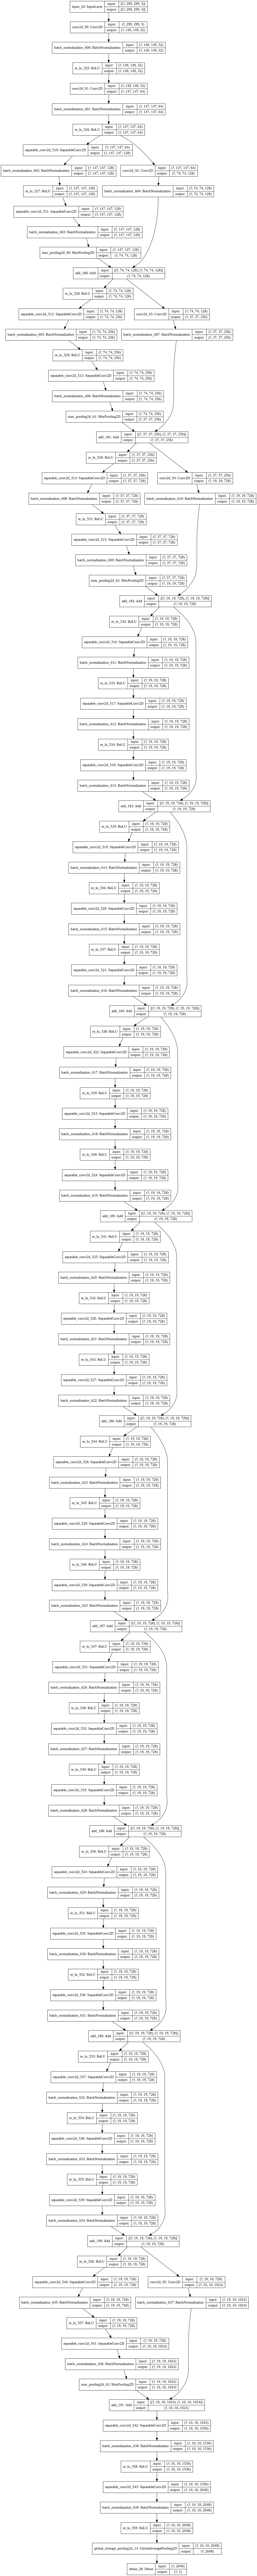

In [89]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)